In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns

from matplotlib import rcParams
rcParams['figure.figsize'] = 15,6

from src import data
!date -I

2024-05-10


In [3]:
df_dice = pd.read_csv( 
    data.path('external/glasser_parcellation_mapping/DICE_Glasser_Yeo17_res-1x1x1.csv'),
    index_col=0
)
df_dice

,1_Visual_A,2_Visual_B,3_Somatomotor_A,4_Somatomotor_B,5_Temporal_Parietal,6_Frontoparietal_Area,7_Dorsal_Attention_B,8_Salience+Ventral_Attention_A,9_Salience+Ventral_Attention_B,10_Control_A,11_Control_B,12_Control_C,13_Default_A,14_Default_B,15_Default_C,16_Limbic_A,17_Limbic_B
glasser_roi,,,,,,,,,,,,,,,,,
Primary_visual_cortex,0.064615,0.204249,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Medial_superior_temporal_area,0.005024,0.000000,0.0,0.0,0.019105,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Sixth_Visual_Area,0.000000,0.065254,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000143,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Second_Visual_Area,0.080482,0.130189,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000189,0.0,0.000000,0.000000,0.000889,0.000028,0.000000
Third_Visual_Area,0.087555,0.055593,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Area_STSv_Anterior,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000740,0.006917,0.000000,0.008169,0.024619
Area_TE1_Middle,0.000000,0.000000,0.0,0.0,0.001455,0.0,0.000000,0.000000,0.002287,0.0,0.000000,0.0,0.070971,0.000000,0.000000,0.000072,0.020839
Para-Insular_Area,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.013649,0.000000,0.001013,0.0,0.000000,0.0,0.000000,0.001842,0.000000,0.000000,0.010214


In [4]:
df_glasser = pd.read_csv(data.path('external/HCP-MMP1_UniqueRegionList.csv'))
df_glasser

,regionName,regionLongName,regionIdLabel,LR,region,Lobe,cortex,regionID,Cortex_ID,x-cog,y-cog,z-cog,volmm
0,V1_L,Primary_Visual_Cortex_L,1_L,L,V1,Occ,Primary_Visual,1,1,100.491589,41.138901,71.637040,6717
1,MST_L,Medial_Superior_Temporal_Area_L,2_L,L,MST,Occ,MT+_Complex_and_Neighboring_Visual_Areas,2,5,132.416667,58.901786,82.059524,336
2,V6_L,Sixth_Visual_Area_L,3_L,L,V6,Occ,Dorsal_Stream_Visual,3,3,104.543112,44.481665,103.916749,1009
3,V2_L,Second_Visual_Area_L,4_L,L,V2,Occ,Early_Visual,4,2,102.236656,44.064791,74.401125,6220
4,V3_L,Third_Visual_Area_L,5_L,L,V3,Occ,Early_Visual,5,2,107.926111,40.632159,76.961153,4994
...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,STSva_R,Area_STSv_anterior_R,376_R,R,STSva,Temp,Auditory_Association,376,11,32.924419,117.527907,54.337791,1720
356,TE1m_R,Area_TE1_Middle_R,377_R,R,TE1m,Temp,Lateral_Temporal,377,14,26.146605,102.236497,53.246528,2592
357,PI_R,Para-Insular_Area_R,378_R,R,PI,Temp,Insular_and_Frontal_Opercular,378,12,47.013363,123.157016,57.926503,898
358,a32pr_R,Area_anterior_32_prime_R,379_R,R,a32pr,Fr,Anterior_Cingulate_and_Medial_Prefrontal,379,19,81.723096,153.990326,102.516324,827


In [5]:
ftract_rois = np.loadtxt(data.path('external/F-TRACT/MNI-HCP-MMP1/MNI-HCP-MMP1.txt'), dtype=str)

In [6]:
ftract_rois[:10]

array(['L_V1', 'L_V6', 'L_V2', 'L_V3', 'L_V4', 'L_V3A', 'L_V7', 'L_IPS1',
       'L_V3B', 'L_V6A'], dtype='<U8')

In [7]:
for i, (a, b) in enumerate(zip(df_glasser.regionLongName, df_dice.index)):
    if a[:-2].lower()!=b.lower():
        print(i, a[:-2], b)

5 Fourth_Visual_Area Forth_Visual_Area
9 Frontal_Eye_Fields Frontal_Eye_Field
19 Area_Lateral_Occipital_1 Lateral_Occipital_Area_1
20 Area_Lateral_Occipital_2 Lateral_Occipital_Area_2
40 Ventral_Area_24d Lateral_Area_7A
41 Lateral_Area_7A Supplementary_and_Cingulate_Eye_Field
42 Supplementary_and_Cingulate_Eye_Field Area_6m_Anterior
43 Area_6m_anterior Medial_6m_anterior
56 Area_Posterior_24_prime Area_Posterior_24
75 Area_47l_(47_lateral) Area_47L
90 Area_11l Area_11
91 Area_13l Area_13
99 Area_OP4-PV Area_OP4/PV
100 Area_OP1-SII Area_OP1/SII
101 Area_OP2-3-VS Area_OP2-3/VS
120 ProStriate_Area ProStraite_Area


In [319]:
df_glasser[40:44]

,regionName,regionLongName,regionIdLabel,LR,region,Lobe,cortex,regionID,Cortex_ID,x-cog,y-cog,z-cog,volmm
40,24dv_L,Ventral_Area_24d_L,41_L,L,24dv,Fr,Paracentral_Lobular_and_Mid_Cingulate,41,7,100.068306,126.534153,115.301913,732
41,7AL_L,Lateral_Area_7A_L,42_L,L,7AL,Par,Superior_Parietal,42,16,112.239867,73.178073,137.489037,1505
42,SCEF_L,Supplementary_and_Cingulate_Eye_Field_L,43_L,L,SCEF,Fr,Paracentral_Lobular_and_Mid_Cingulate,43,7,96.643496,131.532274,128.125124,3021
43,6ma_L,Area_6m_anterior_L,44_L,L,6ma,Fr,Paracentral_Lobular_and_Mid_Cingulate,44,7,110.592627,130.136617,139.421933,3228


In [8]:
def swap_rows(df, r1, r2):
    df.iloc[r1], df.iloc[r2] =  df.iloc[r2].copy(), df.iloc[r1].copy()
    return df

In [9]:
df_dice_fixed = (df_dice
 .reset_index()
 .pipe(swap_rows, r1=41, r2=42)
 .pipe(swap_rows, r1=40, r2=41)
 .pipe(swap_rows, r1=40, r2=43)
 .replace(dict(glasser_roi={
     'Frontal_Eye_Field': 'Frontal_Eye_Fields',
     'Forth_Visual_Area': 'Fourth_Visual_Area',
     'Area_13': 'Area_13l',
     'Area_11': 'Area_11l',
     'Lateral_Occipital_Area_1': 'Area_Lateral_Occipital_1',
     'Lateral_Occipital_Area_2': 'Area_Lateral_Occipital_2',
     'Area_OP4/PV': 'Area_OP4-PV',
     'Area_OP1/SII': 'Area_OP1-SII',
     'ProStraite_Area': 'ProStriate_Area',
     'Area_OP2-3/VS': 'Area_OP2-3-VS',
     'Area_47L': 'Area_47l_(47_lateral)',
 }))
)

for i,(a, b) in enumerate(zip(df_glasser.regionLongName, df_dice_fixed.glasser_roi)):
    if a[:-2].lower()!=b.lower():
        print(i, a[:-2], b)

40 Ventral_Area_24d Medial_6m_anterior
56 Area_Posterior_24_prime Area_Posterior_24


In [10]:
df_glasser.query('regionID==41 | regionID==57')

,regionName,regionLongName,regionIdLabel,LR,region,Lobe,cortex,regionID,Cortex_ID,x-cog,y-cog,z-cog,volmm
40,24dv_L,Ventral_Area_24d_L,41_L,L,24dv,Fr,Paracentral_Lobular_and_Mid_Cingulate,41,7,100.068306,126.534153,115.301913,732
56,p24pr_L,Area_Posterior_24_prime_L,57_L,L,p24pr,Fr,Anterior_Cingulate_and_Medial_Prefrontal,57,19,94.447546,124.308951,110.859480,1039


In [11]:
df_dice_fixed.iloc[[40,56]]

,glasser_roi,1_Visual_A,2_Visual_B,3_Somatomotor_A,4_Somatomotor_B,5_Temporal_Parietal,6_Frontoparietal_Area,7_Dorsal_Attention_B,8_Salience+Ventral_Attention_A,9_Salience+Ventral_Attention_B,10_Control_A,11_Control_B,12_Control_C,13_Default_A,14_Default_B,15_Default_C,16_Limbic_A,17_Limbic_B
40,Medial_6m_anterior,0.0,0.0,0.009248,0.0,0.0,0.027173,0.034002,0.029769,0.0,0.0,0.000000,0.019127,0.009957,0.0,0.0,0.00000,0.000062
56,Area_Posterior_24,0.0,0.0,0.007437,0.0,0.0,0.000000,0.055913,0.002213,0.0,0.0,0.001437,0.000101,0.000000,0.0,0.0,0.00019,0.000556


Let's check if these two are close together in terms of centroids, and call it a day.

In [12]:
np.array(df_glasser.region)

array(['V1', 'MST', 'V6', 'V2', 'V3', 'V4', 'V8', '4', '3b', 'FEF', 'PEF',
       '55b', 'V3A', 'RSC', 'POS2', 'V7', 'IPS1', 'FFC', 'V3B', 'LO1',
       'LO2', 'PIT', 'MT', 'A1', 'PSL', 'SFL', 'PCV', 'STV', '7Pm', '7m',
       'POS1', '23d', 'v23ab', 'd23ab', '31pv', '5m', '5mv', '23c', '5L',
       '24dd', '24dv', '7AL', 'SCEF', '6ma', '7Am', '7Pl', '7PC', 'LIPv',
       'VIP', 'MIP', '1', '2', '3a', '6d', '6mp', '6v', 'p24pr', '33pr',
       'a24pr', 'p32pr', 'a24', 'd32', '8BM', 'p32', '10r', '47m', '8Av',
       '8Ad', '9m', '8BL', '9p', '10d', '8C', '44', '45', '47l', 'a47r',
       '6r', 'IFJa', 'IFJp', 'IFSp', 'IFSa', 'p9-46v', '46', 'a9-46v',
       '9-46d', '9a', '10v', 'a10p', '10pp', '11l', '13l', 'OFC', '47s',
       'LIPd', '6a', 'i6-8', 's6-8', '43', 'OP4', 'OP1', 'OP2-3', '52',
       'RI', 'PFcm', 'PoI2', 'TA2', 'FOP4', 'MI', 'Pir', 'AVI', 'AAIC',
       'FOP1', 'FOP3', 'FOP2', 'PFt', 'AIP', 'EC', 'PreS', 'H', 'ProS',
       'PeEc', 'STGa', 'PBelt', 'A5', 'PHA1', 'PHA3'

## centroid mapping

Ok, so the neuroparc is bit of a mess - better start backwards: f-TRACT glasser rois + centroids and map those to neuroparc centroids (nii derived). All this would be so much easier with siibra...

Load the nii for glasser and compute the centroids as none of the metadata can be trusted (original scripts not available).

In [13]:
import nibabel as nb

In [14]:
from nilearn import plotting

In [15]:
from nilearn import image

In [16]:
nii_np = nb.load(data.path('external/neuroparc/label/Human/Glasser_space-MNI152NLin6_res-1x1x1.nii.gz'))

In [17]:
vol_np = nii_np.get_fdata()
vol_np[:93, :, : ] = 0

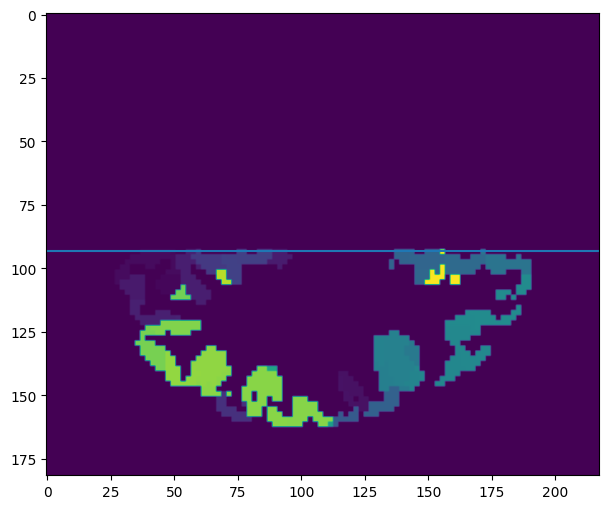

In [18]:
plt.imshow(vol_np[:,:, 100])
plt.axhline(93)

In [19]:
vol_np.shape

(182, 218, 182)

In [20]:
idx = np.where(vol_np==1.0)
ijk = np.vstack(idx).T 
xyz = nb.affines.apply_affine(nii_np.affine, ijk)  # get mm coords

center = xyz.mean(axis=0)

In [21]:
center

array([-1.29505495e+01, -8.55164835e+01,  8.24175824e-02])

        - `"x"`: sagittal
        - `"y"`: coronal
        - `"z"`: axial

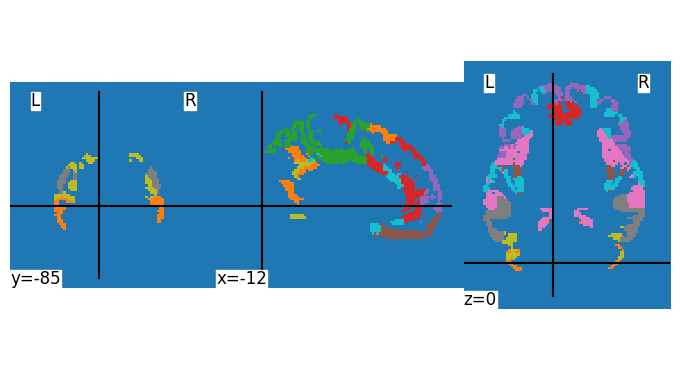

In [22]:
plotting.plot_img(nii_np, cut_coords=center, cmap='tab10')

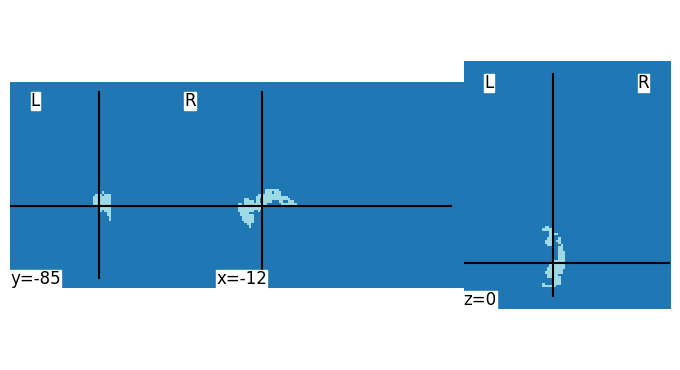

In [23]:
plotting.plot_img(image.new_img_like(nii_np, vol_np==1.0), cut_coords=center, cmap='tab20')

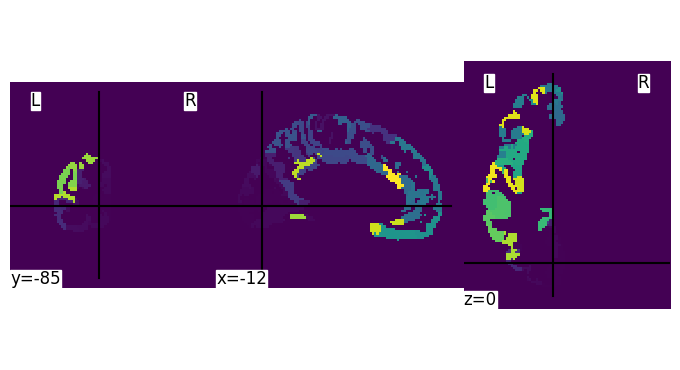

In [24]:
plotting.plot_img(image.new_img_like(nii_np, vol_np), cut_coords=center)

In [25]:
nii_np = nb.load(data.path('external/neuroparc/label/Human/Glasser_space-MNI152NLin6_res-1x1x1.nii.gz'))
vol_np = nii_np.get_fdata()
vol_np[:93, :, : ] = 0

left_centroids = []
for i in range(1, 181):
    idx = np.where(vol_np==i)
    ijk = np.vstack(idx).T 
    xyz = nb.affines.apply_affine(nii_np.affine, ijk)  # get mm coords
    
    left_centroids.append(xyz.mean(axis=0))

In [26]:
nii_np = nb.load(data.path('external/neuroparc/label/Human/Glasser_space-MNI152NLin6_res-1x1x1.nii.gz'))

In [27]:
vol_np = nii_np.get_fdata()
vol_np[91:, :, : ] = 0

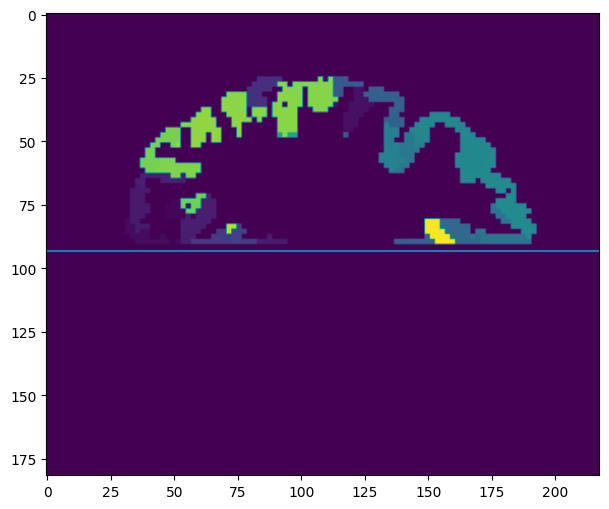

In [28]:
plt.imshow(vol_np[:,:, 100])
plt.axhline(93)

In [29]:
nii_np = nb.load(data.path('external/neuroparc/label/Human/Glasser_space-MNI152NLin6_res-1x1x1.nii.gz'))
vol_np = nii_np.get_fdata()
vol_np[91:, :, : ] = 0

right_centroids = []
for i in range(1, 181):
    idx = np.where(vol_np==i)
    ijk = np.vstack(idx).T 
    xyz = nb.affines.apply_affine(nii_np.affine, ijk)  # get mm coords
    
    right_centroids.append(xyz.mean(axis=0))

In [30]:
centroids = np.array(left_centroids + right_centroids)

In [31]:
centroids.shape

(360, 3)

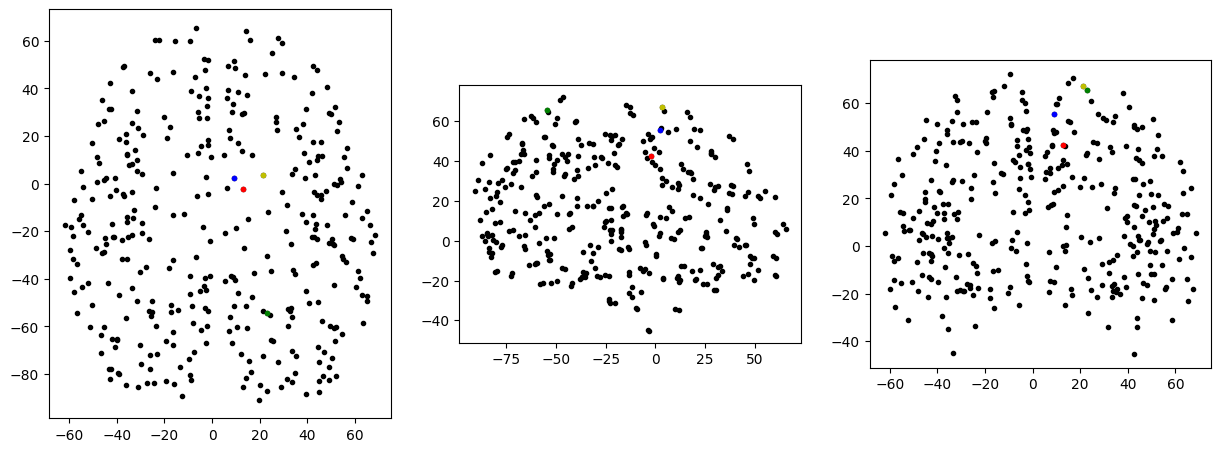

In [175]:
fig, axs = plt.subplots(ncols=3)
axs[0].plot(centroids[:,0]*-1, centroids[:,1], 'k.')
axs[1].plot(centroids[:,1]   , centroids[:,2], 'k.')
axs[2].plot(centroids[:,0]*-1, centroids[:,2], 'k.')

axs[0].plot(centroids[[40],0]*-1, centroids[[40],1], 'r.')
axs[1].plot(centroids[[40],1]   , centroids[[40],2], 'r.')
axs[2].plot(centroids[[40],0]*-1, centroids[[40],2], 'r.')

axs[0].plot(centroids[[41],0]*-1, centroids[[41],1], 'g.')
axs[1].plot(centroids[[41],1]   , centroids[[41],2], 'g.')
axs[2].plot(centroids[[41],0]*-1, centroids[[41],2], 'g.')

axs[0].plot(centroids[[42],0]*-1, centroids[[42],1], 'b.')
axs[1].plot(centroids[[42],1]   , centroids[[42],2], 'b.')
axs[2].plot(centroids[[42],0]*-1, centroids[[42],2], 'b.')

axs[0].plot(centroids[[43],0]*-1, centroids[[43],1], 'y.')
axs[1].plot(centroids[[43],1]   , centroids[[43],2], 'y.')
axs[2].plot(centroids[[43],0]*-1, centroids[[43],2], 'y.')

for ax in axs:
    ax.set(aspect='equal')

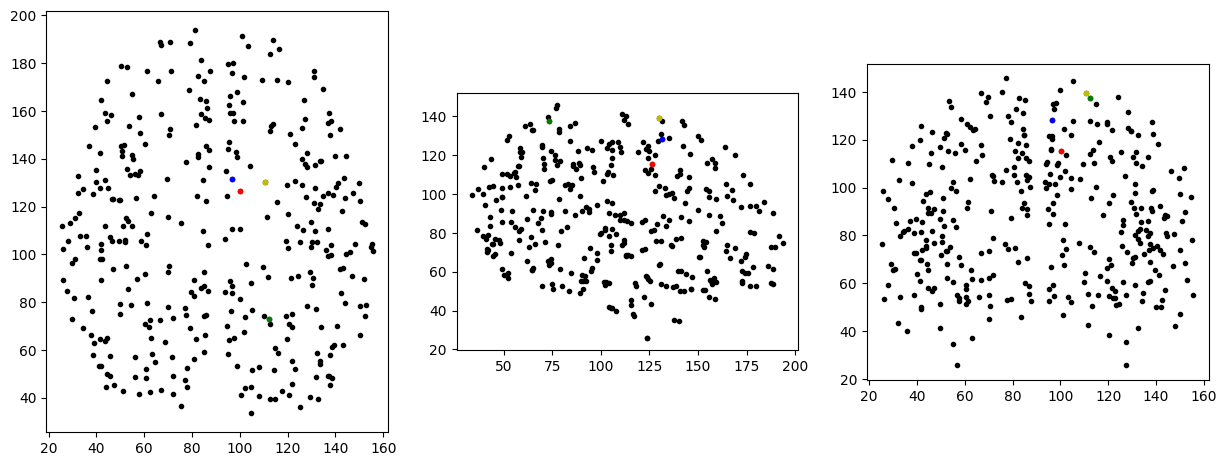

In [169]:
fig, axs = plt.subplots(ncols=3)
axs[0].plot(df_glasser.loc[:,'x-cog'], df_glasser.loc[:,'y-cog'], 'k.')
axs[1].plot(df_glasser.loc[:,'y-cog'], df_glasser.loc[:,'z-cog'], 'k.')
axs[2].plot(df_glasser.loc[:,'x-cog'], df_glasser.loc[:,'z-cog'], 'k.')


axs[0].plot(df_glasser.loc[[40],'x-cog'], df_glasser.loc[[40],'y-cog'], 'r.')
axs[1].plot(df_glasser.loc[[40],'y-cog'], df_glasser.loc[[40],'z-cog'], 'r.')
axs[2].plot(df_glasser.loc[[40],'x-cog'], df_glasser.loc[[40],'z-cog'], 'r.')

axs[0].plot(df_glasser.loc[[41],'x-cog'], df_glasser.loc[[41],'y-cog'], 'g.')
axs[1].plot(df_glasser.loc[[41],'y-cog'], df_glasser.loc[[41],'z-cog'], 'g.')
axs[2].plot(df_glasser.loc[[41],'x-cog'], df_glasser.loc[[41],'z-cog'], 'g.')

axs[0].plot(df_glasser.loc[[42],'x-cog'], df_glasser.loc[[42],'y-cog'], 'b.')
axs[1].plot(df_glasser.loc[[42],'y-cog'], df_glasser.loc[[42],'z-cog'], 'b.')
axs[2].plot(df_glasser.loc[[42],'x-cog'], df_glasser.loc[[42],'z-cog'], 'b.')

axs[0].plot(df_glasser.loc[[43],'x-cog'], df_glasser.loc[[43],'y-cog'], 'y.')
axs[1].plot(df_glasser.loc[[43],'y-cog'], df_glasser.loc[[43],'z-cog'], 'y.')
axs[2].plot(df_glasser.loc[[43],'x-cog'], df_glasser.loc[[43],'z-cog'], 'y.')


for ax in axs:
    ax.set(aspect='equal')

Looks left-right flipped and/or transformed, y-z-axis ok?

Also, the swapped rows seem to be only in the labels, the points are topologically equivalent (no swapping). 

Hence: let's take the labels from the glasser_df (and the abbreviations), and rename the dice scores with them.

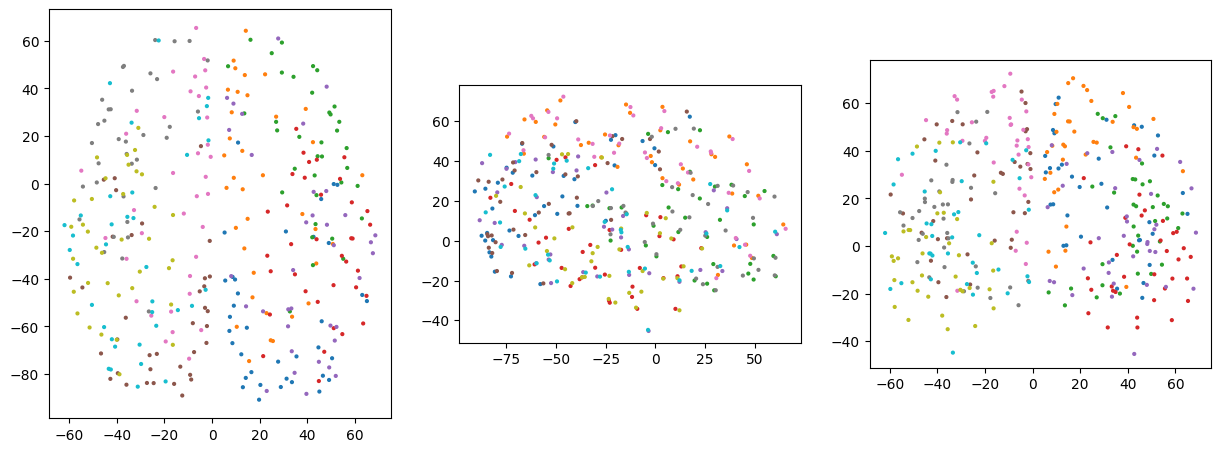

In [192]:
kwds = dict(s=4, c=np.arange(360), cmap='tab10')
fig, axs = plt.subplots(ncols=3)
axs[0].scatter(centroids[:,0]*-1, centroids[:,1], **kwds)
axs[1].scatter(centroids[:,1]   , centroids[:,2], **kwds)
axs[2].scatter(centroids[:,0]*-1, centroids[:,2], **kwds)


for ax in axs:
    ax.set(aspect='equal')

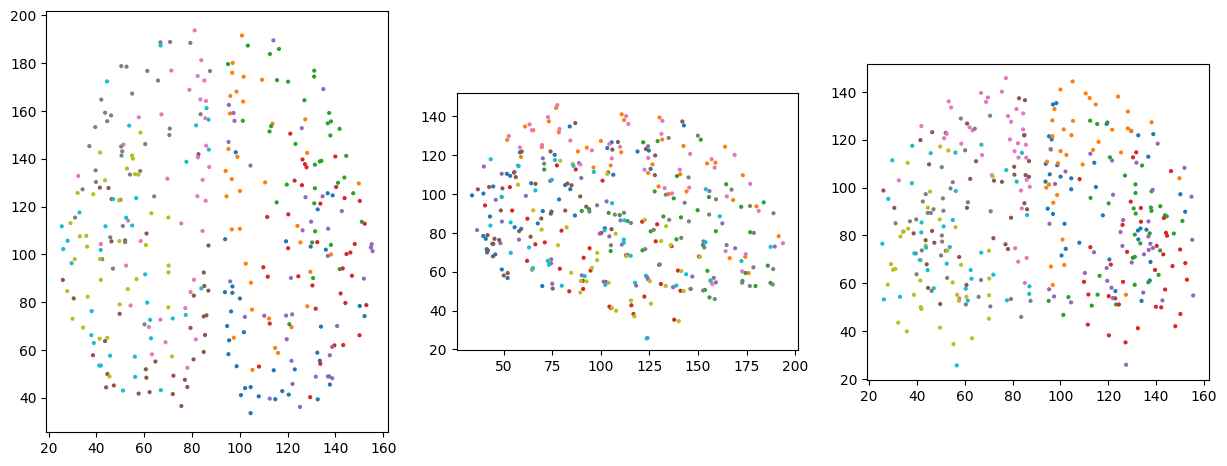

In [193]:
fig, axs = plt.subplots(ncols=3)
axs[0].scatter(df_glasser.loc[:,'x-cog'], df_glasser.loc[:,'y-cog'], **kwds)
axs[1].scatter(df_glasser.loc[:,'y-cog'], df_glasser.loc[:,'z-cog'], **kwds)
axs[2].scatter(df_glasser.loc[:,'x-cog'], df_glasser.loc[:,'z-cog'], **kwds)


for ax in axs:
    ax.set(aspect='equal')

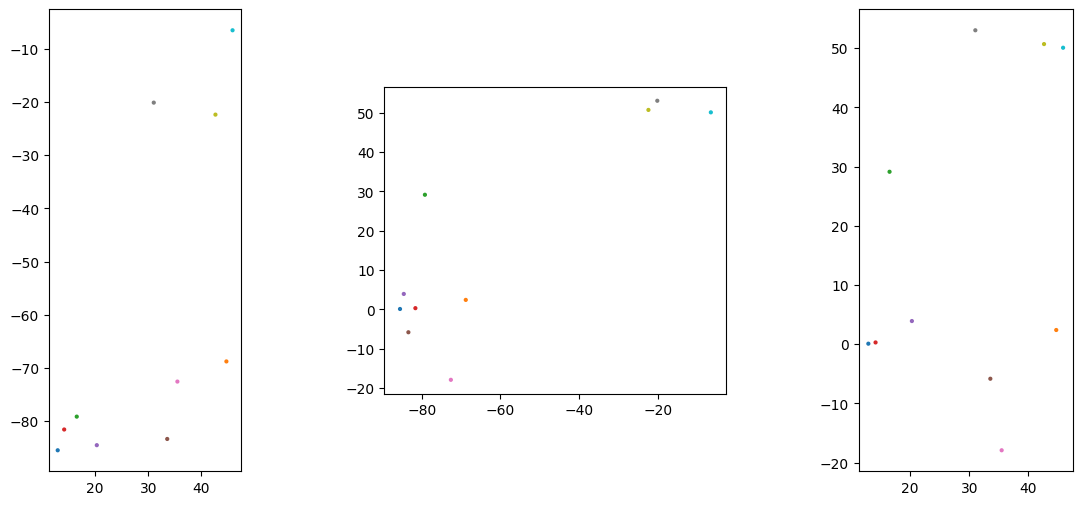

In [202]:
kwds_short = kwds.copy()
kwds_short['c'] = np.arange(10)
kwds = dict(s=4, c=np.arange(360), cmap='tab10')
fig, axs = plt.subplots(ncols=3)
axs[0].scatter(centroids[:10,0]*-1, centroids[:10,1], **kwds_short)
axs[1].scatter(centroids[:10,1]   , centroids[:10,2], **kwds_short)
axs[2].scatter(centroids[:10,0]*-1, centroids[:10,2], **kwds_short)


for ax in axs:
    ax.set(aspect='equal')

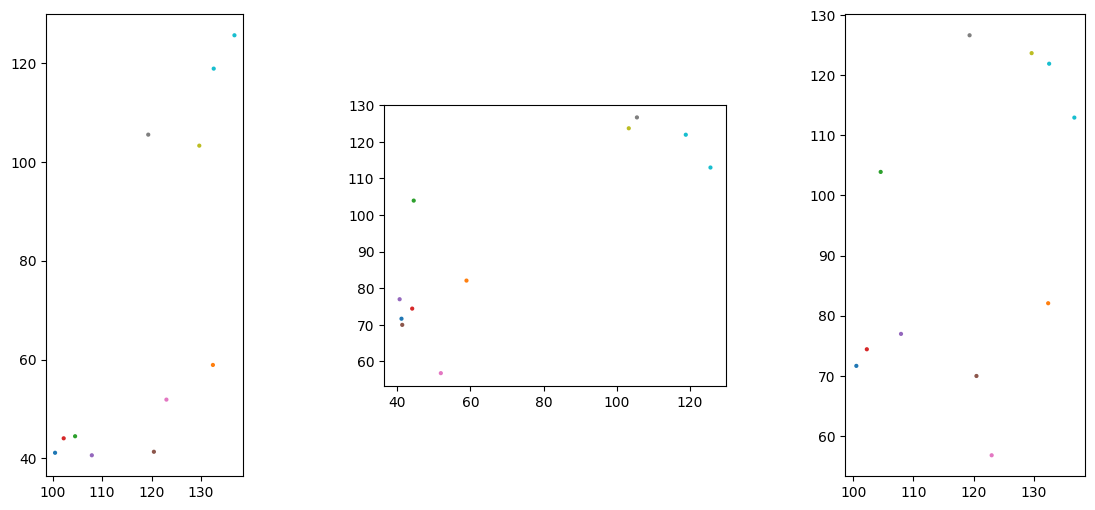

In [200]:
kwds_short = kwds.copy()
kwds_short['c'] = np.arange(11)
fig, axs = plt.subplots(ncols=3)
axs[0].scatter(df_glasser.loc[:10,'x-cog'], df_glasser.loc[:10,'y-cog'], **kwds_short)
axs[1].scatter(df_glasser.loc[:10,'y-cog'], df_glasser.loc[:10,'z-cog'], **kwds_short)
axs[2].scatter(df_glasser.loc[:10,'x-cog'], df_glasser.loc[:10,'z-cog'], **kwds_short)


for ax in axs:
    ax.set(aspect='equal')

In [231]:
gl_points = np.r_[df_glasser.loc[:,['x-cog','y-cog','z-cog']]]
np_points = centroids[:]
np_points[:,0] = np_points[:,0] *-1

In [232]:
pad = lambda x: np.hstack([x, np.ones((x.shape[0], 1))])
unpad = lambda x: x[:,:-1]

X = pad(gl_points)
Y = pad(np_points)

A, res, rank, s = np.linalg.lstsq(X, Y)

transform = lambda x: unpad(np.dot(pad(x), A))


/tmp/ipykernel_344410/3544966062.py:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  A, res, rank, s = np.linalg.lstsq(X, Y)


In [233]:
A, res, rank, s

(array([[ 9.978e-01,  1.511e-02, -7.258e-03,  2.333e-16],
        [-7.897e-03,  9.907e-01,  2.668e-02,  1.162e-16],
        [ 3.110e-03,  1.821e-02,  9.835e-01, -3.960e-16],
        [-8.653e+01, -1.291e+02, -7.359e+01,  1.000e+00]]),
 array([8.116e+02, 1.290e+03, 1.172e+03, 3.621e-30]),
 4,
 array([3216.816,  755.99 ,  600.157,    3.527]))

In [234]:
gl_centroids = np.r_[df_glasser.loc[:,['x-cog','y-cog','z-cog']]]
gl_centroids = transform(gl_centroids)

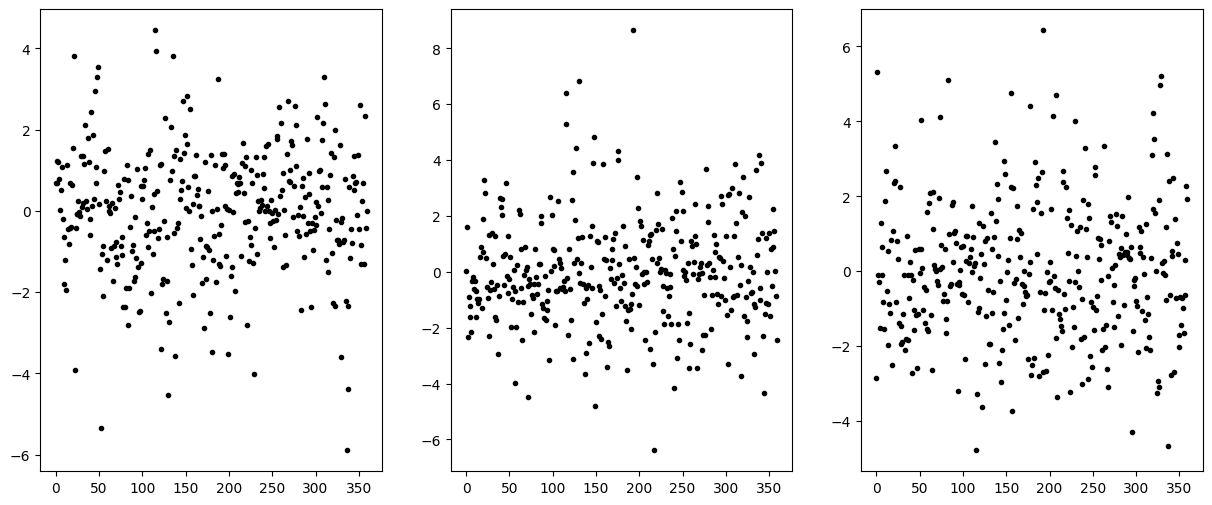

In [237]:
fig, axs = plt.subplots(ncols=3)
axs[0].plot(gl_centroids[:,0]- centroids[:,0],'k.')
axs[1].plot(gl_centroids[:,1]- centroids[:,1],'k.')
axs[2].plot(gl_centroids[:,2]- centroids[:,2],'k.')

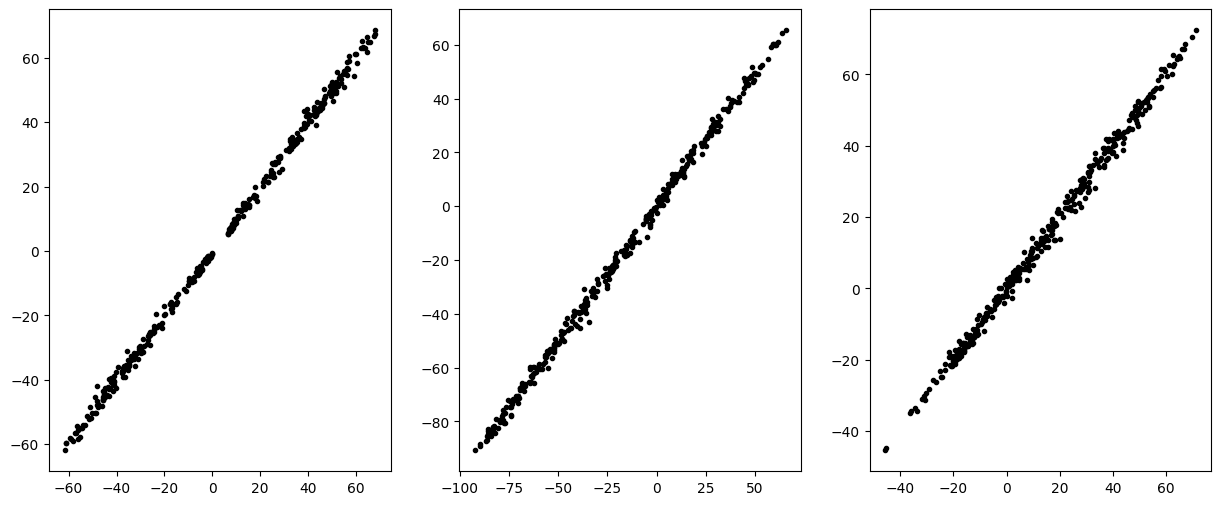

In [239]:
fig, axs = plt.subplots(ncols=3)
axs[0].plot(gl_centroids[:,0], centroids[:,0],'k.')
axs[1].plot(gl_centroids[:,1], centroids[:,1],'k.')
axs[2].plot(gl_centroids[:,2], centroids[:,2],'k.')

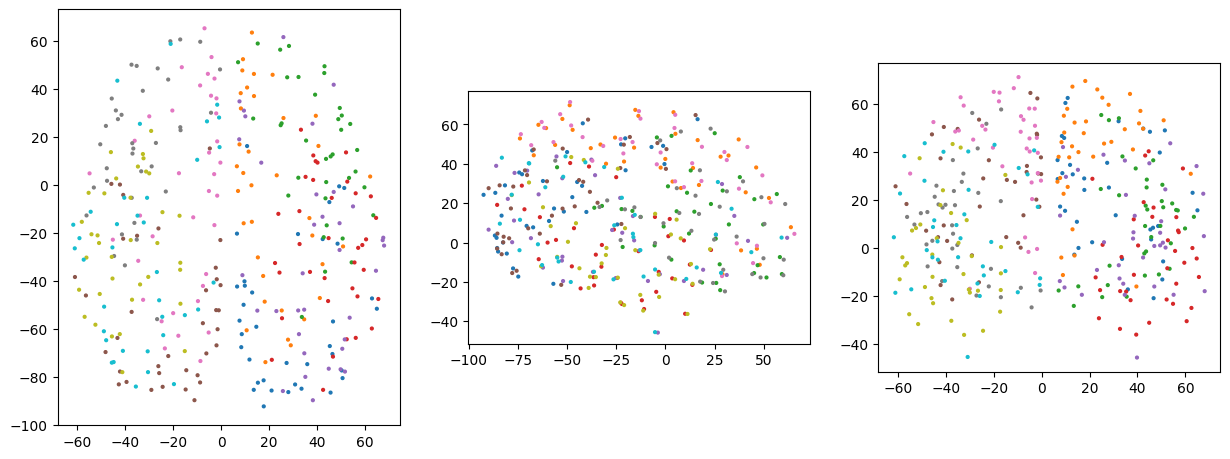

In [235]:
kwds = dict(s=4, c=np.arange(360), cmap='tab10')
fig, axs = plt.subplots(ncols=3)
axs[0].scatter(gl_centroids[:,0], gl_centroids[:,1], **kwds)
axs[1].scatter(gl_centroids[:,1], gl_centroids[:,2], **kwds)
axs[2].scatter(gl_centroids[:,0], gl_centroids[:,2], **kwds)


for ax in axs:
    ax.set(aspect='equal')

Ok, that looks very close and also in-order.

In [243]:
d = np.zeros((360, 360))
for i in range(360):
    d[i,:] = np.sum((gl_centroids[i,:] - centroids)**2, axis=1)

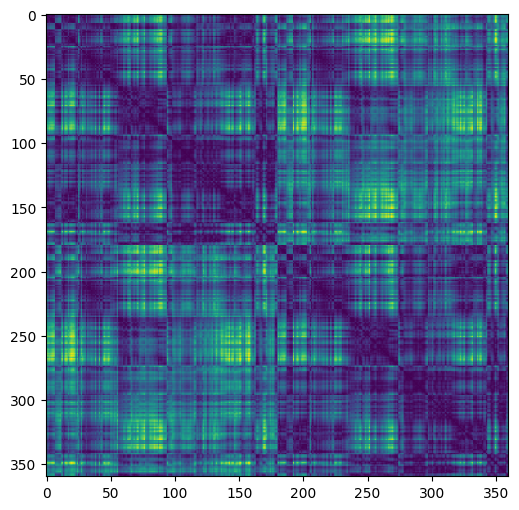

In [274]:
plt.imshow(d)

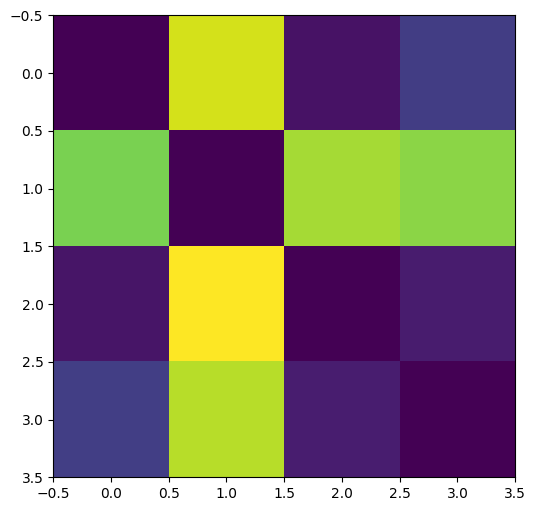

In [316]:
plt.imshow(d[40:44,40:44])

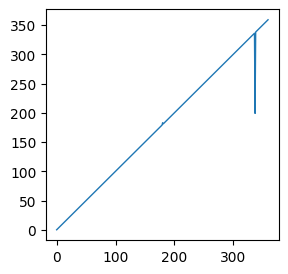

In [310]:
plt.figure(figsize=(3,3))
plt.plot(np.argmin(d,axis=1), lw=1)

In [312]:
np.argwhere(np.argmin(d,axis=1)-np.arange(360) != 0.).squeeze()

array([180, 337])

In [313]:
np.argmin(d[180,:]),np.argmin(d[337,:])

(183, 199)

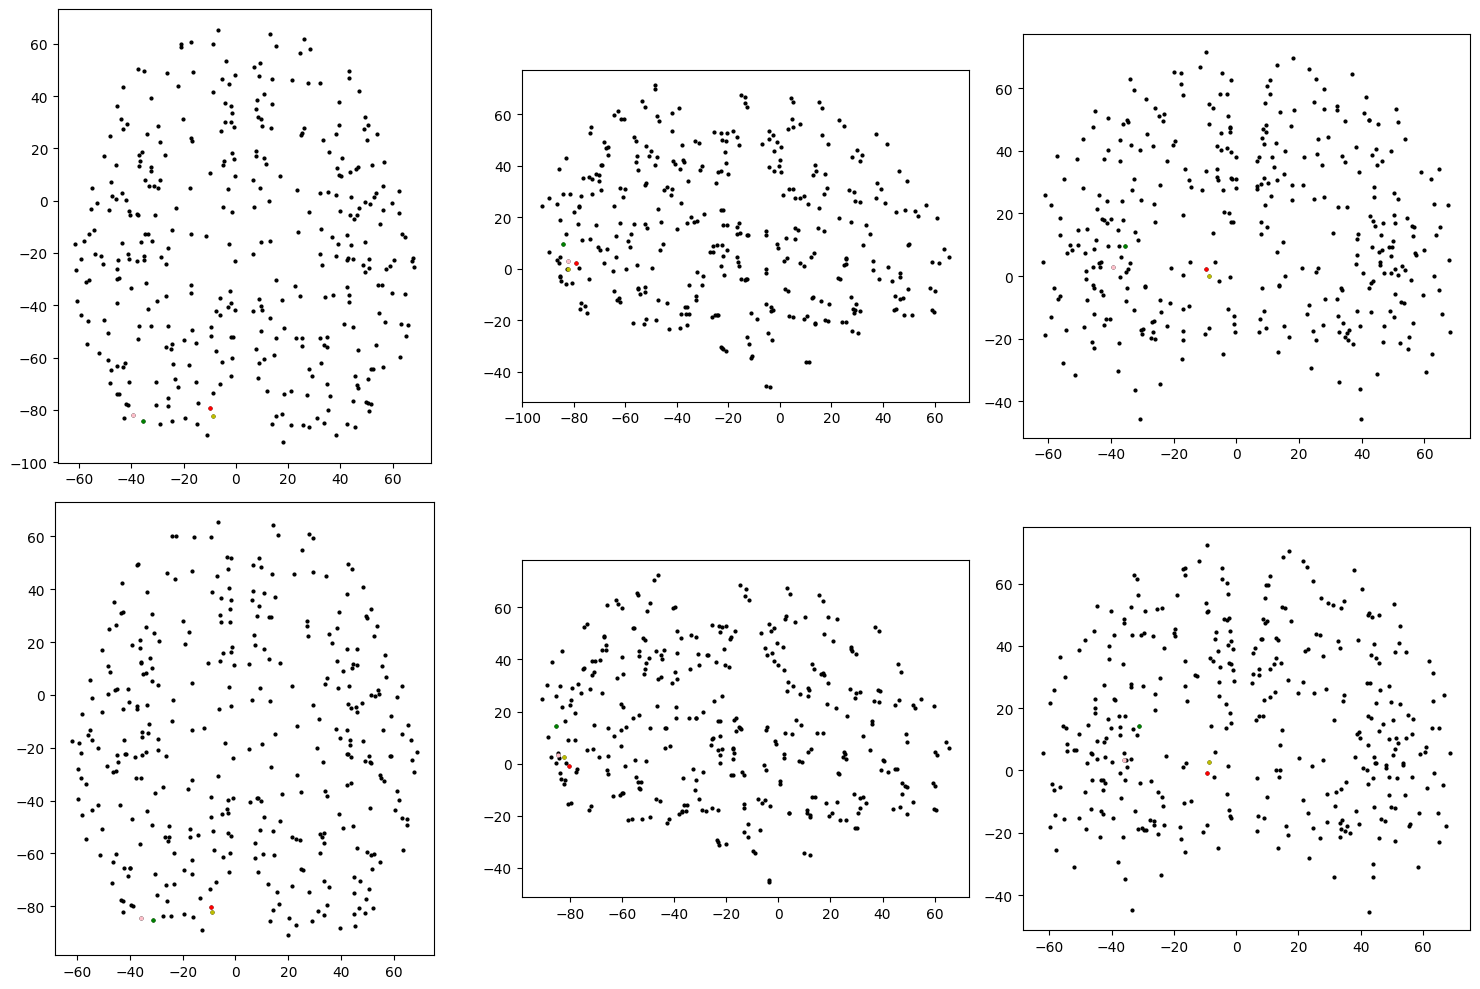

In [306]:
kwds = dict(s=4, c='k')#np.arange(360), cmap='tab10')
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(15,10))

def plot_points(axs, cs, **kwds):
    axs[0].scatter(cs[:,0], cs[:,1], **kwds)
    axs[1].scatter(cs[:,1], cs[:,2], **kwds)
    axs[2].scatter(cs[:,0], cs[:,2], **kwds)

plot_points(axs[0,:],gl_centroids, **kwds)
plot_points(axs[1,:],centroids, **kwds)

plot_points(axs[0,:],gl_centroids[[180],:], s=4, c='y')
plot_points(axs[0,:],gl_centroids[[183],:], s=4, c='r')

plot_points(axs[1,:],centroids[[180],:], s=4, c='y')
plot_points(axs[1,:],centroids[[183],:], s=4, c='r')



plot_points(axs[0,:],gl_centroids[[337],:], s=4, c='g')
plot_points(axs[0,:],gl_centroids[[199],:], s=4, c='pink')

plot_points(axs[1,:],centroids[[337],:], s=4, c='g')
plot_points(axs[1,:],centroids[[199],:], s=4, c='pink')
for ax in axs.flatten():
    ax.set(aspect='equal')

fig.tight_layout()

Yeah, just a coincidence. Final verdict: both are in the same order, only the labels in the neuroparc repository are shifted around.

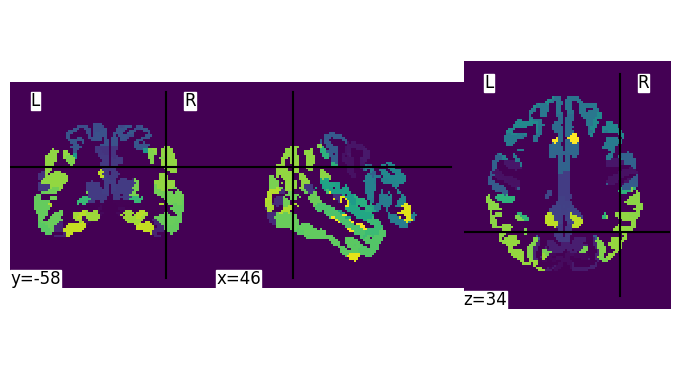

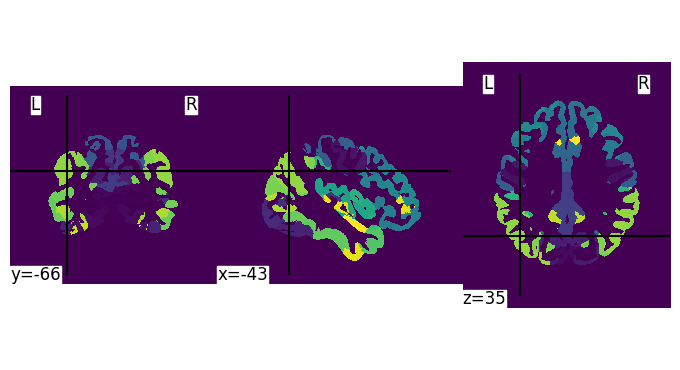

In [353]:
plotting.plot_img(nii_np)
plotting.plot_img(nii_horn)

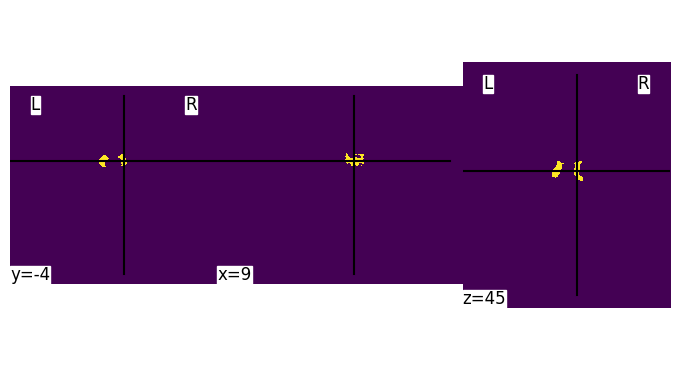

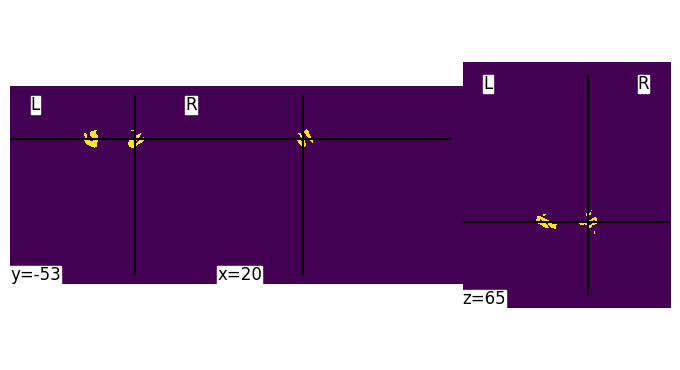

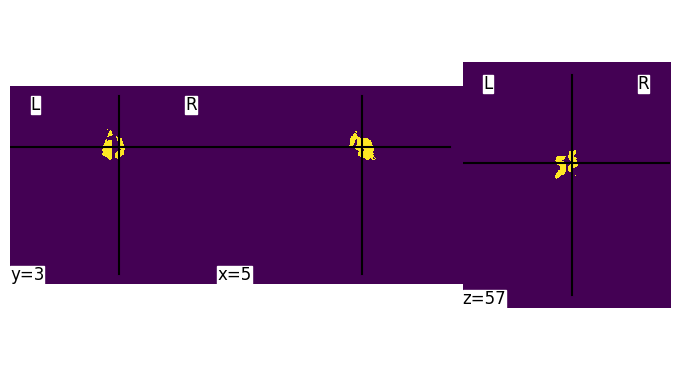

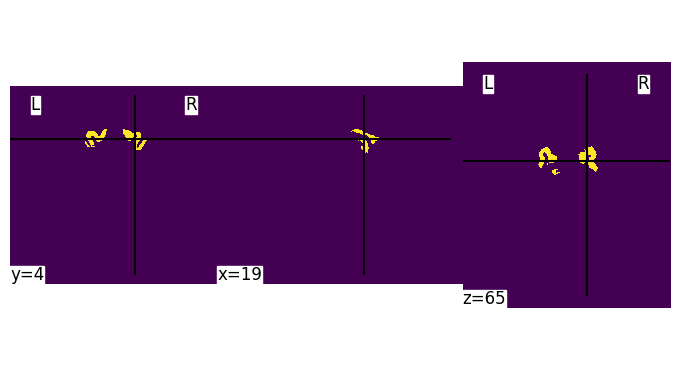

In [342]:
nii_horn = nb.load(data.path('external/glasser_parcellation_mapping/horn_figshare/HCPMMP1_on_MNI152_ICBM2009a_nlin_hd.nii.gz'))
for i in [40, 41, 42, 43]:
    plotting.plot_img(nb.Nifti1Image(np.isclose(nii_horn.get_fdata(),i+1).astype(float), nii_horn.affine), cut_coords=centroids_horn[i])

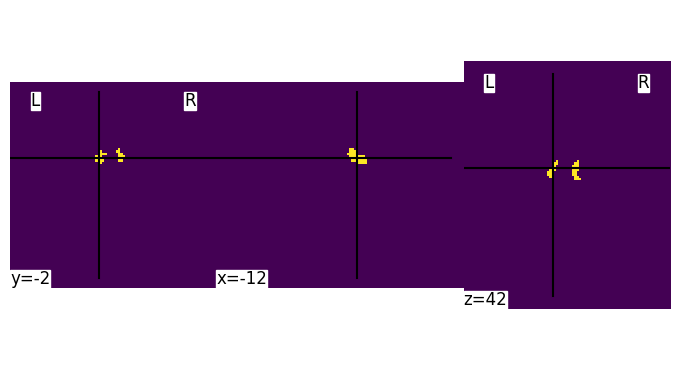

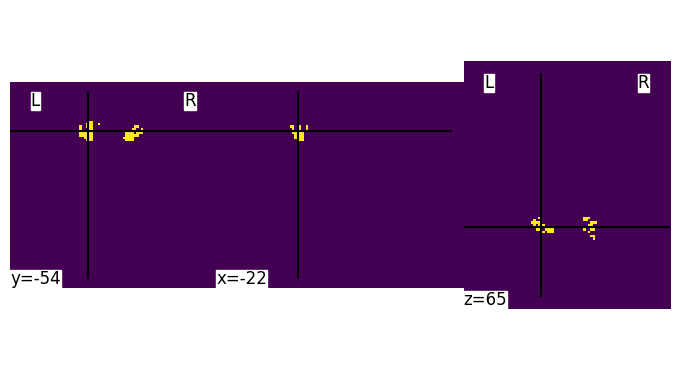

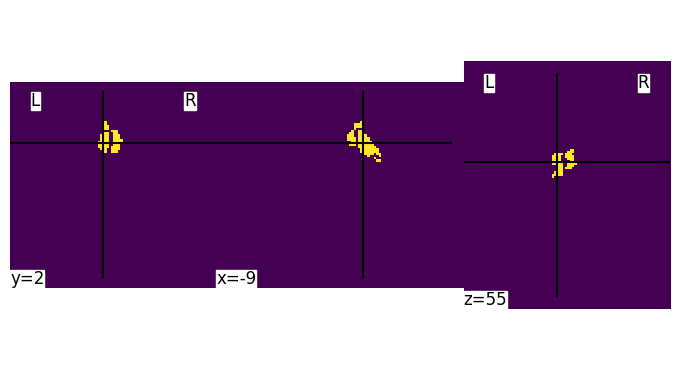

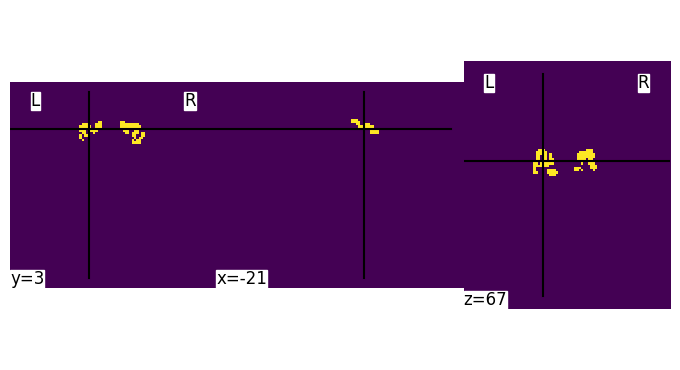

In [355]:
nii_np = nb.load(data.path('external/neuroparc/label/Human/Glasser_space-MNI152NLin6_res-1x1x1.nii.gz'))
for i in [40, 41, 42, 43]:
    plotting.plot_img(nb.Nifti1Image(np.isclose(nii_np.get_fdata(),i+1).astype(float), nii_np.affine), cut_coords=(centroids*np.array([-1,1,1]))[i])

Yeah, the same - the bug is definitelly in the labeling 🤦

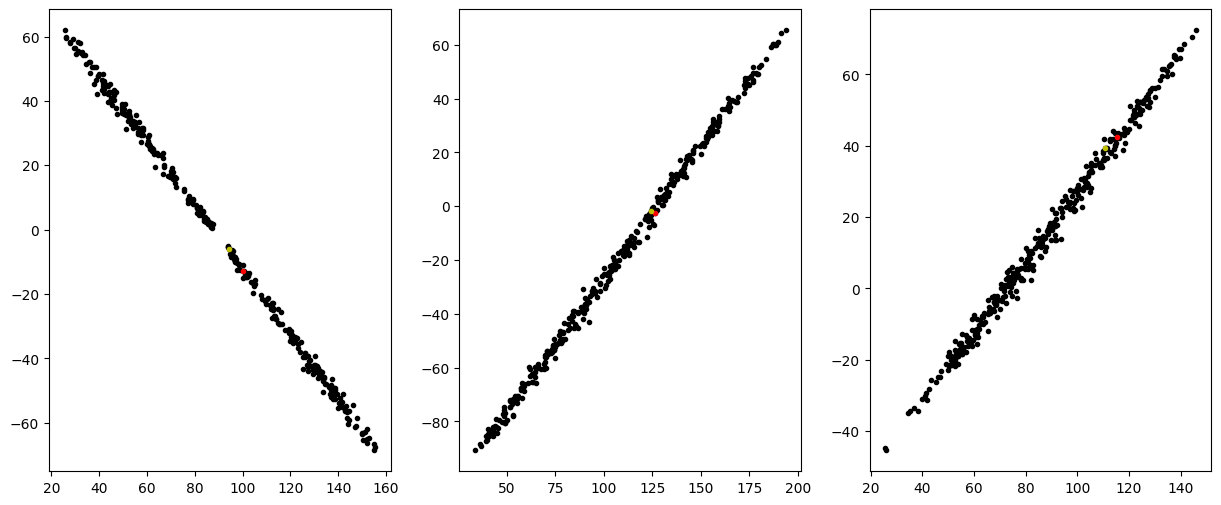

In [34]:
fig, axs = plt.subplots(ncols=3)
axs[0].plot(df_glasser.loc[:,'x-cog'], centroids[:,0],'k.')
axs[1].plot(df_glasser.loc[:,'y-cog'], centroids[:,1],'k.')
axs[2].plot(df_glasser.loc[:,'z-cog'], centroids[:,2],'k.')

axs[0].plot(df_glasser.loc[[40],'x-cog'], centroids[[40],0],'r.')
axs[1].plot(df_glasser.loc[[40],'y-cog'], centroids[[40],1],'r.')
axs[2].plot(df_glasser.loc[[40],'z-cog'], centroids[[40],2],'r.')

axs[0].plot(df_glasser.loc[[56],'x-cog'], centroids[[56],0],'y.')
axs[1].plot(df_glasser.loc[[56],'y-cog'], centroids[[56],1],'y.')
axs[2].plot(df_glasser.loc[[56],'z-cog'], centroids[[56],2],'y.')

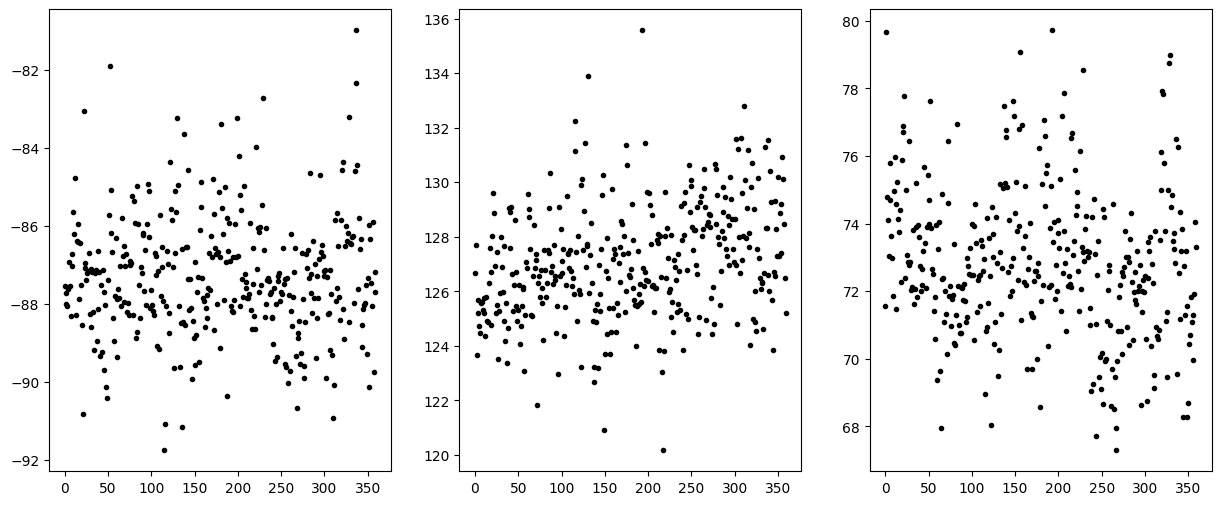

In [180]:
fig, axs = plt.subplots(ncols=3)
axs[0].plot(df_glasser.loc[:,'x-cog']*-1- centroids[:,0],'k.')
axs[1].plot(df_glasser.loc[:,'y-cog']- centroids[:,1],'k.')
axs[2].plot(df_glasser.loc[:,'z-cog']- centroids[:,2],'k.')

Yeah, x is flipped. Also, looks like points are close, but not exactly -- probably due to nonlinear transform... The last two discrepancies are a match as is (not swapped).

```sh
$ antsApplyTransforms \
    -r reference_brains/MNI152NLin6_res-1x1x1_T1w.nii.gz \
    -i label/Human/Glasser_space-MNI152NLin6_res-1x1x1.nii.gz \
    -t transforms/MNI152NLin6_2_MNI152NLin2009cAsym.h5 \
    -n NearestNeighbor \
    -o Glasser_space-MNI152NLin2009cAsym_res-1x1x1.nii.gz
```

In [141]:
nii_np2 = nb.load(data.path('external/neuroparc/Glasser_space-MNI152NLin2009cAsym_res-1x1x1.nii.gz'))

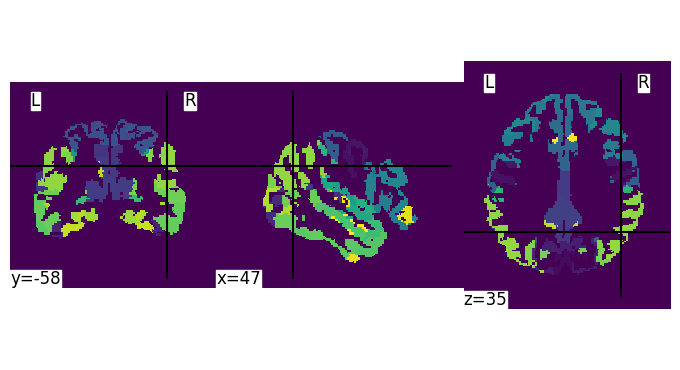

In [142]:
plotting.plot_img(nii_np2)

In [148]:
vol_np2 = nii_np2.get_fdata()
#vol_np2[91:, :, : ] = 0

In [150]:
vol_np2.shape

(182, 218, 182)

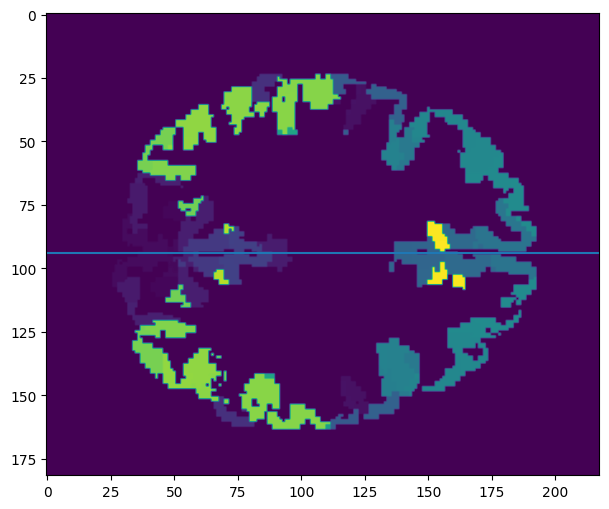

In [151]:
plt.imshow(vol_np2[:,:, 100])
plt.axhline(94)

In [156]:
nii_np2 = nb.load(data.path('external/neuroparc/Glasser_space-MNI152NLin2009cAsym_res-1x1x1.nii.gz'))
vol_np2 = nii_np2.get_fdata()
vol_np2[:94, :, : ] = 0

left_centroids2 = []
for i in range(1, 181):
    idx = np.where(vol_np2==i)
    ijk = np.vstack(idx).T 
    xyz = nb.affines.apply_affine(nii_np2.affine, ijk)  # get mm coords
    
    left_centroids2.append(xyz.mean(axis=0))

In [157]:
nii_np2 = nb.load(data.path('external/neuroparc/Glasser_space-MNI152NLin2009cAsym_res-1x1x1.nii.gz'))
vol_np2 = nii_np2.get_fdata()
vol_np2[93:, :, : ] = 0

right_centroids2 = []
for i in range(1, 181):
    idx = np.where(vol_np2==i)
    ijk = np.vstack(idx).T 
    xyz = nb.affines.apply_affine(nii_np2.affine, ijk)  # get mm coords
    
    right_centroids2.append(xyz.mean(axis=0))

In [158]:
centroids2 = np.array(left_centroids2 + right_centroids2)

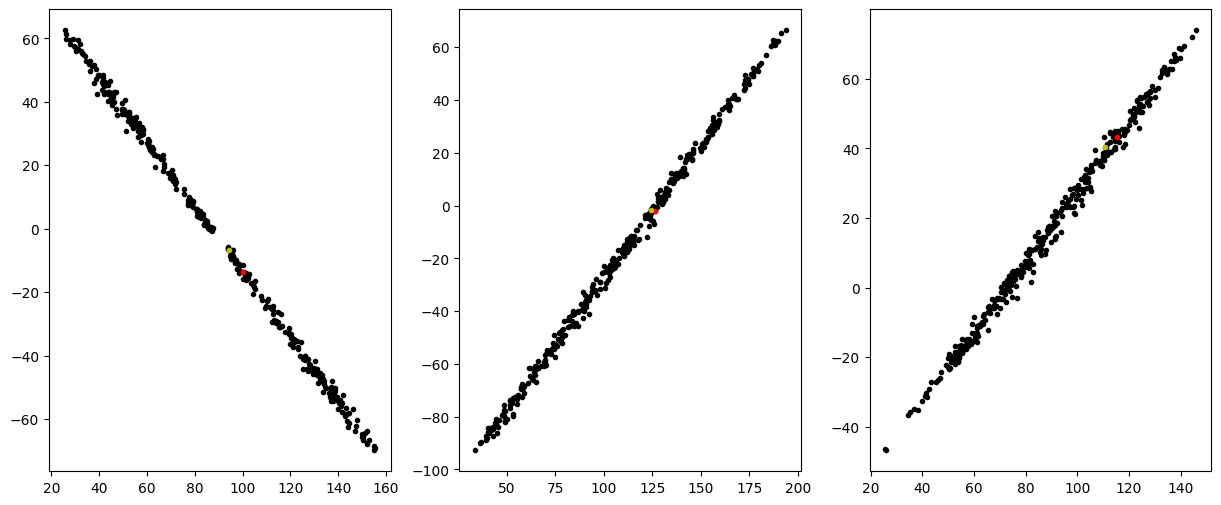

In [159]:
fig, axs = plt.subplots(ncols=3)
axs[0].plot(df_glasser.loc[:,'x-cog'], centroids2[:,0],'k.')
axs[1].plot(df_glasser.loc[:,'y-cog'], centroids2[:,1],'k.')
axs[2].plot(df_glasser.loc[:,'z-cog'], centroids2[:,2],'k.')

axs[0].plot(df_glasser.loc[[40],'x-cog'], centroids2[[40],0],'r.')
axs[1].plot(df_glasser.loc[[40],'y-cog'], centroids2[[40],1],'r.')
axs[2].plot(df_glasser.loc[[40],'z-cog'], centroids2[[40],2],'r.')

axs[0].plot(df_glasser.loc[[56],'x-cog'], centroids2[[56],0],'y.')
axs[1].plot(df_glasser.loc[[56],'y-cog'], centroids2[[56],1],'y.')
axs[2].plot(df_glasser.loc[[56],'z-cog'], centroids2[[56],2],'y.')

## final ordering

So now we can safely reorder the matrix according the F-TRACT labels.

In [35]:
nii_mmp = nb.load(data.path('external/glasser_parcellation_mapping/HCP-MMP-1mm/HCP-MMP-1mm.nii.gz'))

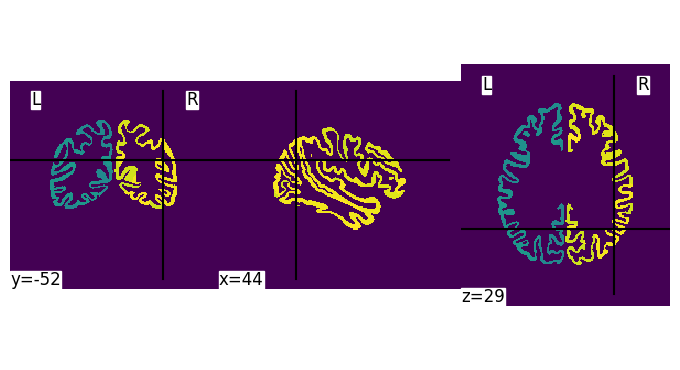

In [36]:
plotting.plot_img(nii_mmp)

In [37]:
nii_mmp.get_fdata().shape, nii_mmp.get_fdata().min(),nii_mmp.get_fdata().max()
# left: 1xxx ; right: 2xxx

((190, 220, 190), 0.0, 2180.0)

In [38]:
nii_mmp = nb.load(data.path('external/glasser_parcellation_mapping/HCP-MMP-1mm/HCP-MMP-1mm.nii.gz'))
vol_mmp = nii_mmp.get_fdata()

centroids_mmp = []
for i in range(1001, 1181):
    idx = np.where(vol_mmp==i)
    ijk = np.vstack(idx).T 
    xyz = nb.affines.apply_affine(nii_mmp.affine, ijk)  # get mm coords
    
    centroids_mmp.append(xyz.mean(axis=0))

for i in range(2001, 2181):
    idx = np.where(vol_mmp==i)
    ijk = np.vstack(idx).T 
    xyz = nb.affines.apply_affine(nii_mmp.affine, ijk)  # get mm coords
    
    centroids_mmp.append(xyz.mean(axis=0))

In [39]:
centroids_mmp = np.array(centroids_mmp)

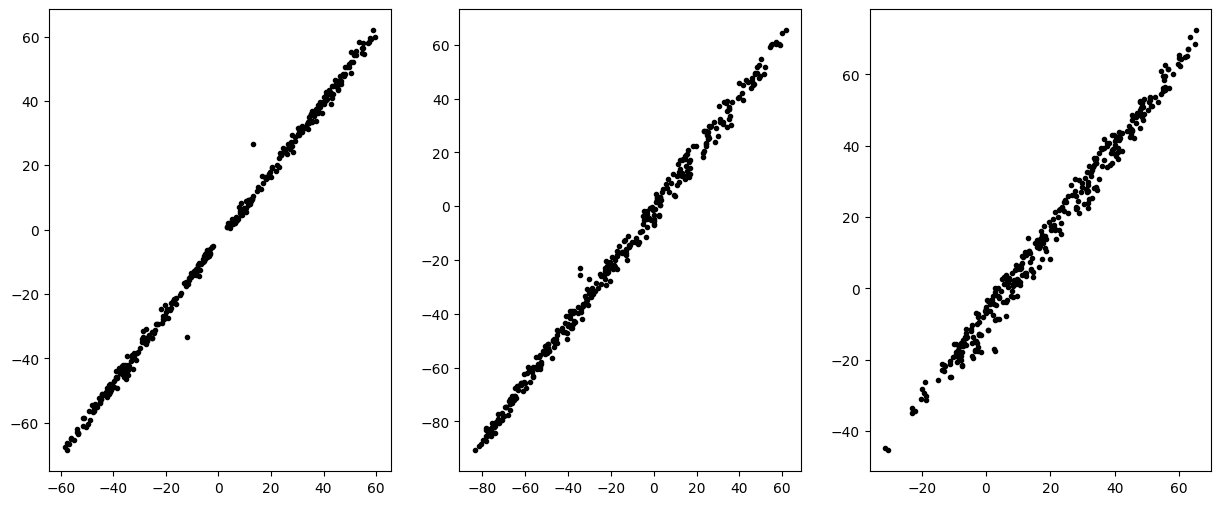

In [67]:
fig, axs = plt.subplots(ncols=3)
axs[0].plot(centroids_mmp[:,0], centroids[:,0],'k.')
axs[1].plot(centroids_mmp[:,1], centroids[:,1],'k.')
axs[2].plot(centroids_mmp[:,2], centroids[:,2],'k.')

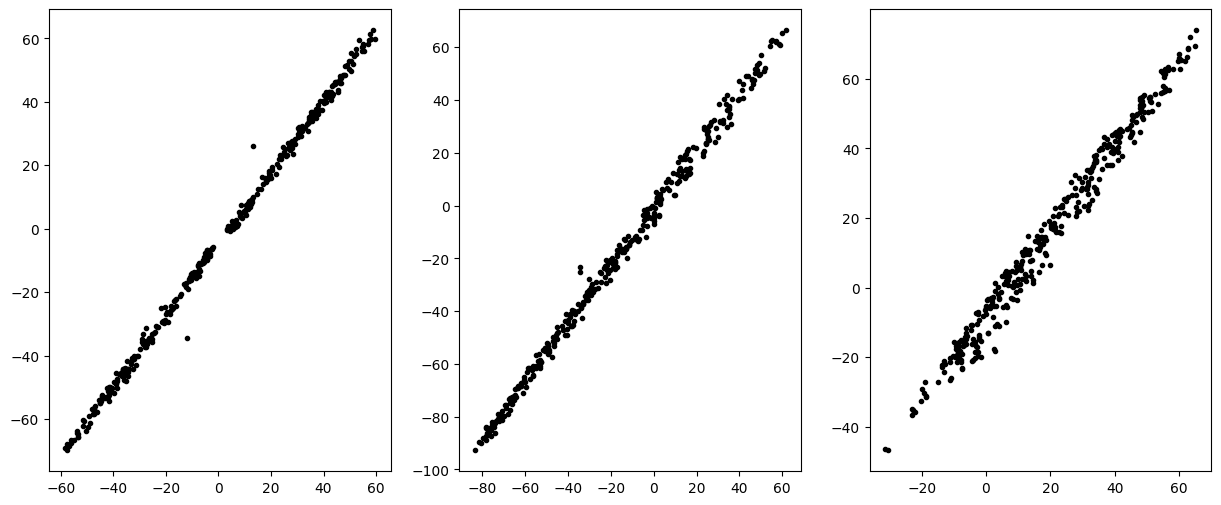

In [162]:
fig, axs = plt.subplots(ncols=3)
axs[0].plot(centroids_mmp[:,0], centroids2[:,0],'k.')
axs[1].plot(centroids_mmp[:,1], centroids2[:,1],'k.')
axs[2].plot(centroids_mmp[:,2], centroids2[:,2],'k.')

These are also in a different space, moreover there seem to be some swapping.

In [41]:
nii_horn = nb.load(data.path('external/glasser_parcellation_mapping/horn_figshare/HCPMMP1_on_MNI152_ICBM2009a_nlin_hd.nii.gz'))

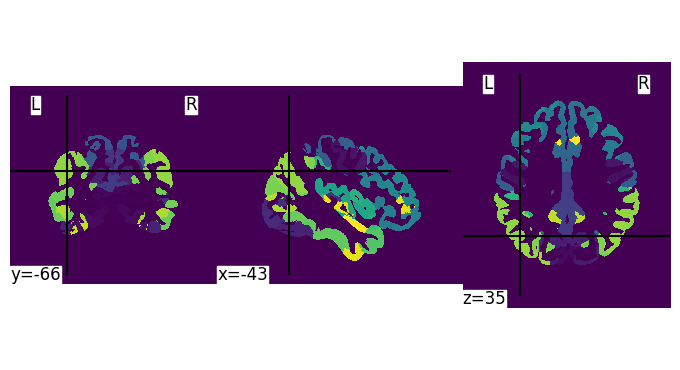

In [42]:
plotting.plot_img(nii_horn)

In [52]:
vol_horn.shape

(393, 465, 377)

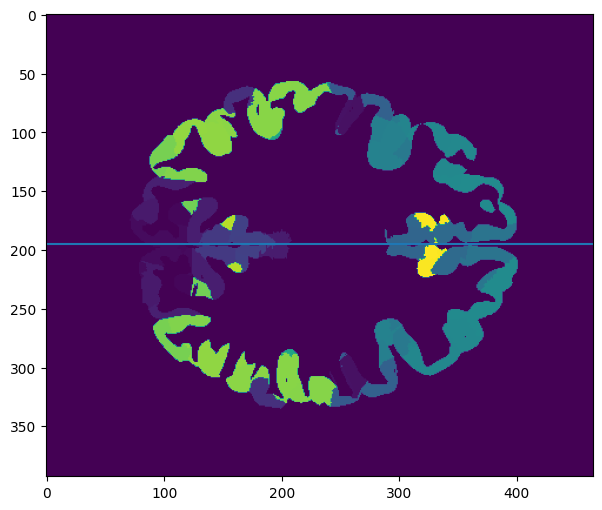

In [56]:
plt.imshow(vol_horn[:,:, 200])
plt.axhline(195)

In [43]:
nii_horn.get_fdata().shape, nii_horn.get_fdata().min(),nii_horn.get_fdata().max()
# left: 1xxx ; right: 2xxx

((393, 465, 377), 0.0, 179.99999995809048)

In [45]:
np.max(np.abs(
    np.round(nii_horn.get_fdata().flatten()) - nii_horn.get_fdata().flatten()
))

4.190951585769653e-08

In [49]:
vol_horn = np.round(nii_horn.get_fdata())
np.unique(vol_horn), np.unique(vol_horn).shape

(array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
         33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
         44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
         55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
         66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
         77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
         88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
         99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
        110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
        121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
        132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
        143., 144., 145., 146., 147., 

In [68]:
nii_horn = nb.load(data.path('external/glasser_parcellation_mapping/horn_figshare/HCPMMP1_on_MNI152_ICBM2009a_nlin_hd.nii.gz'))
vol_horn = np.round(nii_horn.get_fdata())
vol_horn[:195, :, : ] = 0

centroids_horn = []
for i in range(1, 181):
    idx = np.where(vol_horn==i)
    ijk = np.vstack(idx).T 
    xyz = nb.affines.apply_affine(nii_horn.affine, ijk)  # get mm coords
    
    centroids_horn.append(xyz.mean(axis=0))

In [69]:
centroids_horn = np.array(centroids_horn)

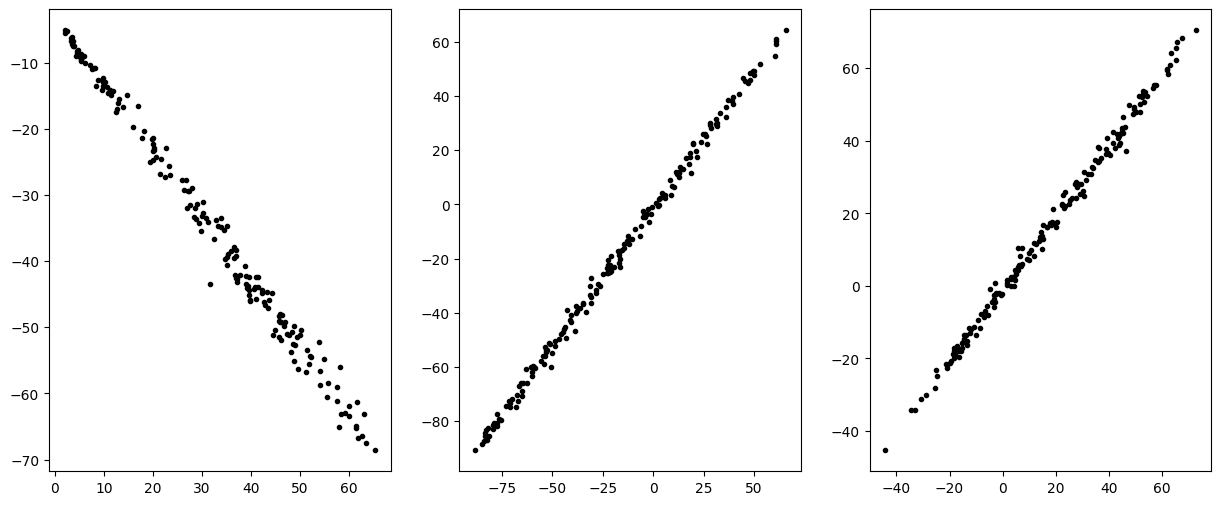

In [70]:
fig, axs = plt.subplots(ncols=3)
axs[0].plot(centroids_horn[:,0], centroids[:180,0],'k.')
axs[1].plot(centroids_horn[:,1], centroids[:180,1],'k.')
axs[2].plot(centroids_horn[:,2], centroids[:180,2],'k.')

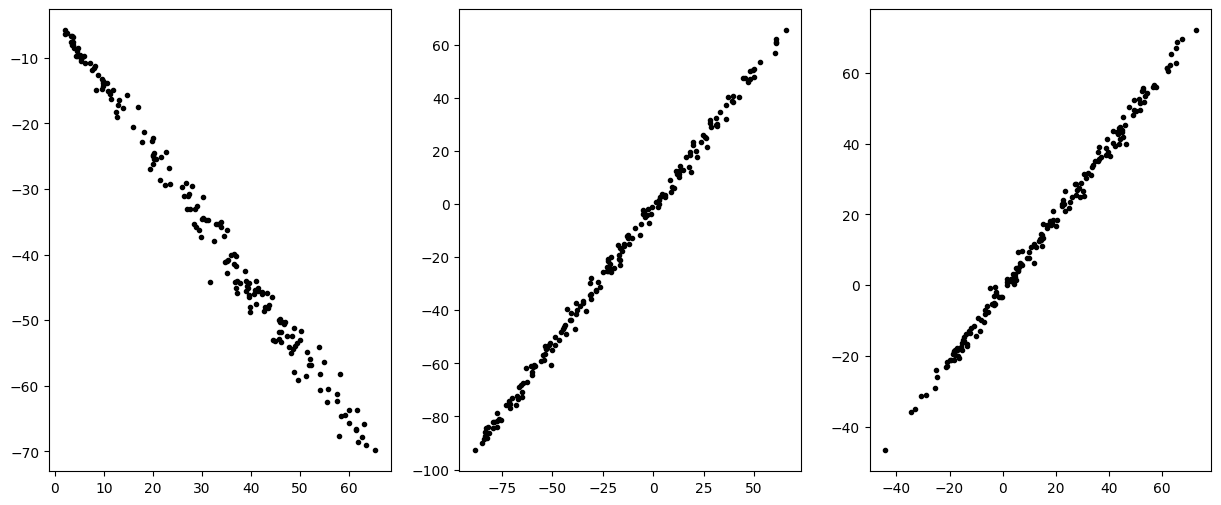

In [161]:
fig, axs = plt.subplots(ncols=3)
axs[0].plot(centroids_horn[:,0], centroids2[:180,0],'k.')
axs[1].plot(centroids_horn[:,1], centroids2[:180,1],'k.')
axs[2].plot(centroids_horn[:,2], centroids2[:180,2],'k.')

In [363]:
df_glasser

,regionName,regionLongName,regionIdLabel,LR,region,Lobe,cortex,regionID,Cortex_ID,x-cog,y-cog,z-cog,volmm
0,V1_L,Primary_Visual_Cortex_L,1_L,L,V1,Occ,Primary_Visual,1,1,100.491589,41.138901,71.637040,6717
1,MST_L,Medial_Superior_Temporal_Area_L,2_L,L,MST,Occ,MT+_Complex_and_Neighboring_Visual_Areas,2,5,132.416667,58.901786,82.059524,336
2,V6_L,Sixth_Visual_Area_L,3_L,L,V6,Occ,Dorsal_Stream_Visual,3,3,104.543112,44.481665,103.916749,1009
3,V2_L,Second_Visual_Area_L,4_L,L,V2,Occ,Early_Visual,4,2,102.236656,44.064791,74.401125,6220
4,V3_L,Third_Visual_Area_L,5_L,L,V3,Occ,Early_Visual,5,2,107.926111,40.632159,76.961153,4994
...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,STSva_R,Area_STSv_anterior_R,376_R,R,STSva,Temp,Auditory_Association,376,11,32.924419,117.527907,54.337791,1720
356,TE1m_R,Area_TE1_Middle_R,377_R,R,TE1m,Temp,Lateral_Temporal,377,14,26.146605,102.236497,53.246528,2592
357,PI_R,Para-Insular_Area_R,378_R,R,PI,Temp,Insular_and_Frontal_Opercular,378,12,47.013363,123.157016,57.926503,898
358,a32pr_R,Area_anterior_32_prime_R,379_R,R,a32pr,Fr,Anterior_Cingulate_and_Medial_Prefrontal,379,19,81.723096,153.990326,102.516324,827


In [389]:
df_ftract = pd.DataFrame({'regionName':['_'.join(r.split('_')[::-1]) for r in ftract_rois]})
df_ftract = df_ftract.merge(df_glasser.replace({'regionName':{'7Pl_L':'7PL_L', '7Pl_R':'7PL_R'}}), on='regionName')
df_ftract

,regionName,regionLongName,regionIdLabel,LR,region,Lobe,cortex,regionID,Cortex_ID,x-cog,y-cog,z-cog,volmm
0,V1_L,Primary_Visual_Cortex_L,1_L,L,V1,Occ,Primary_Visual,1,1,100.491589,41.138901,71.637040,6717
1,V6_L,Sixth_Visual_Area_L,3_L,L,V6,Occ,Dorsal_Stream_Visual,3,3,104.543112,44.481665,103.916749,1009
2,V2_L,Second_Visual_Area_L,4_L,L,V2,Occ,Early_Visual,4,2,102.236656,44.064791,74.401125,6220
3,V3_L,Third_Visual_Area_L,5_L,L,V3,Occ,Early_Visual,5,2,107.926111,40.632159,76.961153,4994
4,V4_L,Fourth_Visual_Area_L,6_L,L,V4,Occ,Early_Visual,6,2,120.481621,41.344329,69.955702,3183
...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,FOP2_R,Frontal_Opercular_Area_2_R,315_R,R,FOP2,Ins,Insular_and_Frontal_Opercular,315,12,49.524038,122.612981,86.716346,416
356,PoI1_R,Area_Posterior_Insular_1_R,367_R,R,PoI1,Ins,Insular_and_Frontal_Opercular,367,12,52.456420,115.341143,68.178069,1067
357,Ig_R,Insular_Granular_Complex_R,368_R,R,Ig,Ins,Insular_and_Frontal_Opercular,368,12,54.984127,112.083900,86.482993,441
358,FOP5_R,Area_Frontal_Opercular_5_R,369_R,R,FOP5,Ins,Insular_and_Frontal_Opercular,369,12,53.738178,153.878893,75.189158,867


With this we can relabel the DICE scores from neuroparc.

In [399]:
df_ftract[['regionName']]

,regionName
0,V1_L
1,V6_L
2,V2_L
3,V3_L
4,V4_L
...,...
355,FOP2_R
356,PoI1_R
357,Ig_R
358,FOP5_R


In [400]:
df_ftract[['regionName']].merge(
    pd.concat(
        [
            df_glasser.replace({'regionName':{'7Pl_L':'7PL_L', '7Pl_R':'7PL_R'}}).regionName,
            (df_dice
             .reset_index()
             .drop(columns='glasser_roi')
            )
        ],
        axis=1
    ),
    on='regionName'
)

,regionName,1_Visual_A,2_Visual_B,3_Somatomotor_A,4_Somatomotor_B,5_Temporal_Parietal,6_Frontoparietal_Area,7_Dorsal_Attention_B,8_Salience+Ventral_Attention_A,9_Salience+Ventral_Attention_B,10_Control_A,11_Control_B,12_Control_C,13_Default_A,14_Default_B,15_Default_C,16_Limbic_A,17_Limbic_B
0,V1_L,0.064615,0.204249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
1,V6_L,0.000000,0.065254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000143,0.0,0.0,0.0,0.000000,0.000000,0.0
2,V2_L,0.080482,0.130189,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000189,0.0,0.0,0.0,0.000889,0.000028,0.0
3,V3_L,0.087555,0.055593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
4,V4_L,0.092793,0.002934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,FOP2_R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,PoI1_R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
357,Ig_R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358,FOP5_R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
